# **Data Diri**

---
(Peserta Kampus merdeka - Student Indepentdent)


Nama : Gusti Muhammad Aulia Nur Sulthan

Alamat :  Kabupaten Hulu Sungai Selatan, Kalimantan Selatan

SIB Id : M247R6216

SIB Email : M247R6216@dicoding.org	

SIB Group : M3

# Introduction :
Topik dalam projek ini tentang klasifikasi stroke terhadap manusia dengan 12 attribut. Topik ini dibuat untuk Submission 1 Machine Learning Terapan Dicoding.

# Data Loading

## Download Package
install package `opendatasets` yang digunakan untuk mendownload dataset dari google

In [1]:
! pip install opendatasets

In [2]:
! pip install plotly

In [3]:
! pip install imblearn

## Importing Libraries 
Library yang digunakan dalam notebook ini

In [4]:
import opendatasets as od


import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px


import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
%matplotlib inline

## Download Dataset 

In [5]:
od.download('https://www.kaggle.com/fedesoriano/stroke-prediction-dataset')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: tnnz20
Your Kaggle Key: ··········


100%|██████████| 67.4k/67.4k [00:00<00:00, 28.3MB/s]

### Dataset Information 

![](https://github.com/tnnz20/machine-learning-terapan/blob/main/Predictive-Analysis/image/dataset.png?raw=1)

**Information :**

Type | Information
--- | ---
Source | [Kaggle Dataset : Stroke Prediction Dataset](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset)
License | Data files © Original Authors
Category | Health
Usage Rating | 10.0 (Gold)
File Type and Size | CSV (317 kb)

## Read Dataset

In [6]:
df = pd.read_csv('stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Atribute Information

Attribute | Information
--- | ---
id | unique indentifier
gender | gender patient ('Male', 'Female', or 'Other')
age | age of the patient
hypertension | 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
heart_disease | 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
ever_married | "No" or "Yes"
work_type | "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
Residence_type | "Rural" or "Urban"
avg_glucose_level | average glucose level in blood
bmi | body mass index
smoking_status | "formerly smoked", "never smoked", "smokes" or "Unknown"*
stroke | 1 if the patient had a stroke or 0 if not


**Note: "Unknown" in smoking_status means that the information is unavailable for this patient**



# Exploratory Data Analysis

## Total Data

In [7]:
print(f'Jumlah Data {df.shape[0]} dan memiliki {df.shape[1]} Attributes')

Jumlah Data 5110 dan memiliki 12 Attributes


## Check dataset information

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


dalam tabel informasi dataset terdapat :
* 7 numeric variable diantaranya 4 bertipe int 3 bertipe float
* 5 non numeric variable bertipe object

## Description dataset


### Deskripsi data Numeric

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


### Deskrispi data object

In [10]:
df.describe(include=object).T

,count,unique,top,freq
gender,5110,3,Female,2994
ever_married,5110,2,Yes,3353
work_type,5110,5,Private,2925
Residence_type,5110,2,Urban,2596
smoking_status,5110,4,never smoked,1892


## Check Missing Value

In [11]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Terlihat di tabel ada `missing value` pada attribute **bmi**

## Check unique value

In [12]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

## Check Duplicate

In [13]:
df.duplicated().sum()

0

Tidak ada data duplikat

## Check Stroke Diagnose (label)

In [14]:
stroke = df['stroke']

print(f'Jumlah pasien yang tidak stroke : {stroke.value_counts()[0]} ({round(stroke.value_counts(normalize=True)[0]*100,2)}%)')
print(f'Jumlah pasien yang stroke : {stroke.value_counts()[1]} ({round(stroke.value_counts(normalize=True)[1]*100,2)}%)')

Jumlah pasien yang tidak stroke : 4861 (95.13%)
Jumlah pasien yang stroke : 249 (4.87%)


Note* 
<br>Sesuai keterangan pada `attribute information` yang mana
* `0` adalah pasien yang tidak memiliki stroke
* `1` adalah pasien yang memiliki storke

In [15]:
stroke_data = pd.DataFrame(df['stroke'].value_counts())

figures = px.pie(data_frame=stroke_data,
                 values='stroke',
                 names=['Not Stroke','Stroke'],
                 hole=0.4,
                 color_discrete_sequence=["#FF7171","#9FD8DF"],
                 labels={'label':'Stroke','Stroke':'No. Of Samples'})

figures.update_layout(font_family='Open Sans',
                      title=dict(text='Distribusi attribute pada kolom Stroke',
                                 font=dict(color="#333",size=20)))

figures.update_traces(textposition='outside', textinfo='percent+label')

figures.show()

> Terlihat pada grafik diatas bahwa jumlah pasien yang tidak stroke lebih banyak dibanding dengan pasien terkena stroke

## Univariate Analysis

### Categoric feature

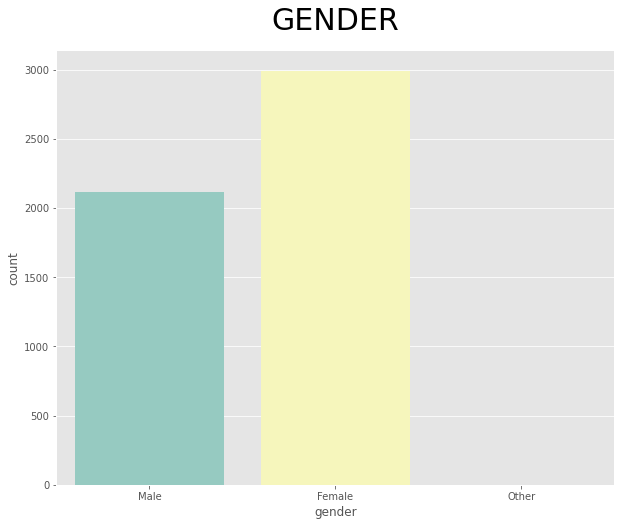

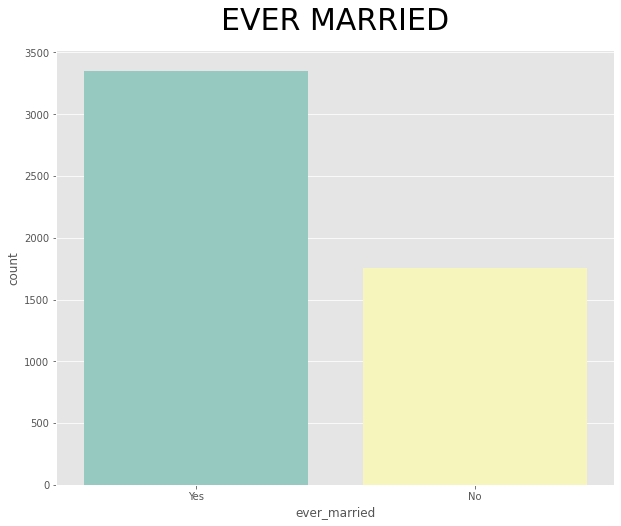

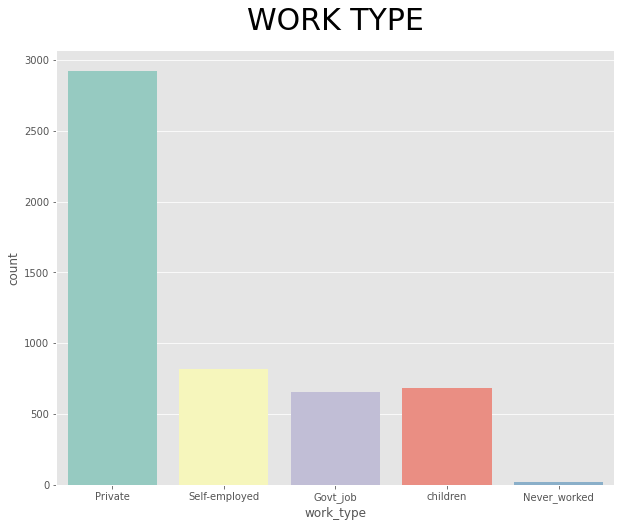

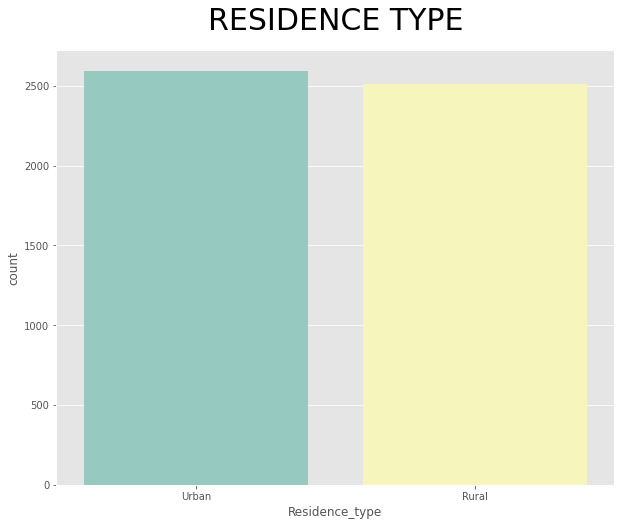

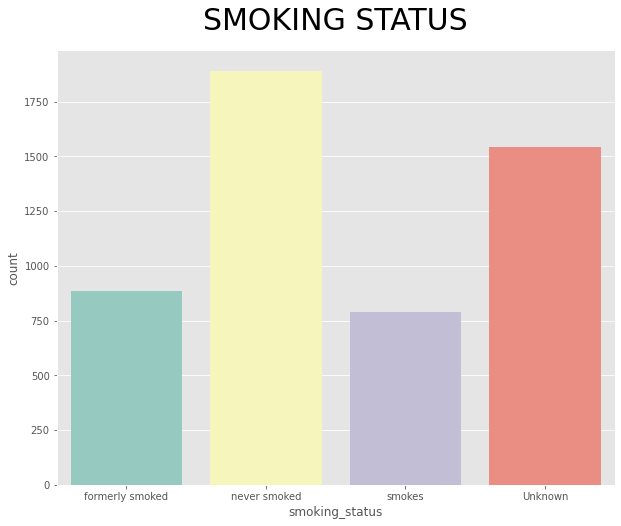

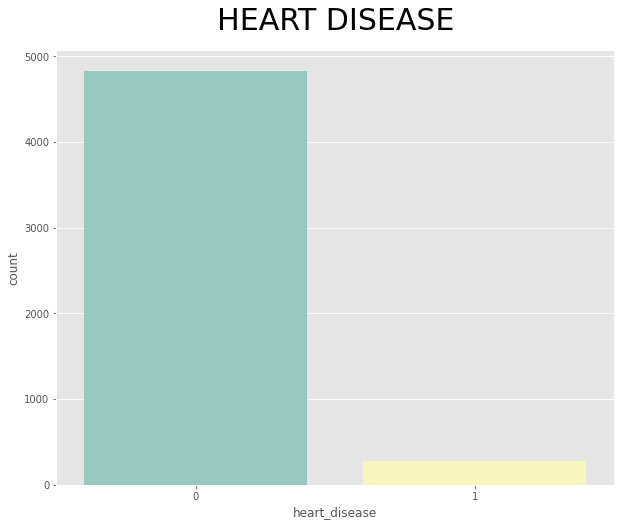

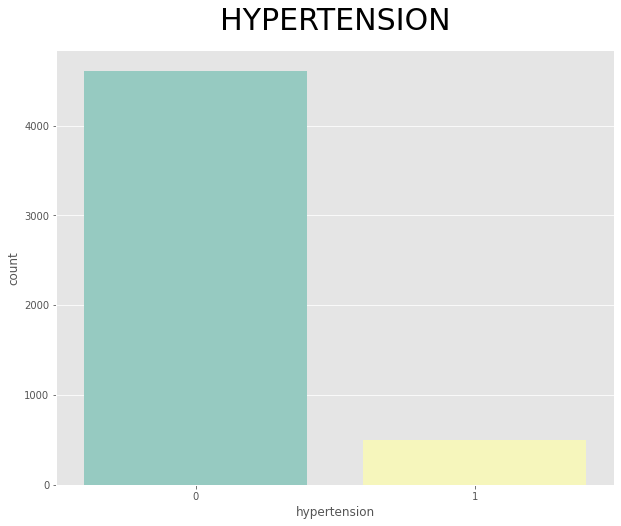

In [16]:
categoric_column = ['gender', 'ever_married', 'work_type', 
                    'Residence_type', 'smoking_status',
                    'heart_disease', 'hypertension']

for column in categoric_column:
  plt.figure(figsize=(10,8))
  sns.countplot(data=df, x=column, palette='Set3')
  plt.title(column.upper().replace('_', ' '), fontsize=30, pad =20)
  plt.show()

Kesimpulan Grafik Categoric terhadap datasets:
* pada grafik feature `Gender` data dominan adalah perempuan dan dalam grafik tersebut terlihat ada *Other* yang dimana Gender manusia hanya ada dua Yaitu *female* dan *male*

* pada grafik feature `ever_maried` data dominan terhadap pernah kawin

* pada grafik feature `work_type` data cenderung pada *private* 

* pada grafik feature `residence_type` data *urban* maupun *rural* hampir berimbang data *urabn* sedikit lebih banyak.

* pada grafik feature `smoking_status` data terbanyak adalah *never smoked* dan iringi oleh data *unknown*

* pada grafik feature `heartt_disease` data dominan terhadap yang tidak pernah terkena serangan jantung *0* ketimbang kena *1*

* pada grafik feature `hypertension` data dominan terhadap yang tidak memiliki hypertensi *0* ketimbang memiliki *1*




### Numeric feature

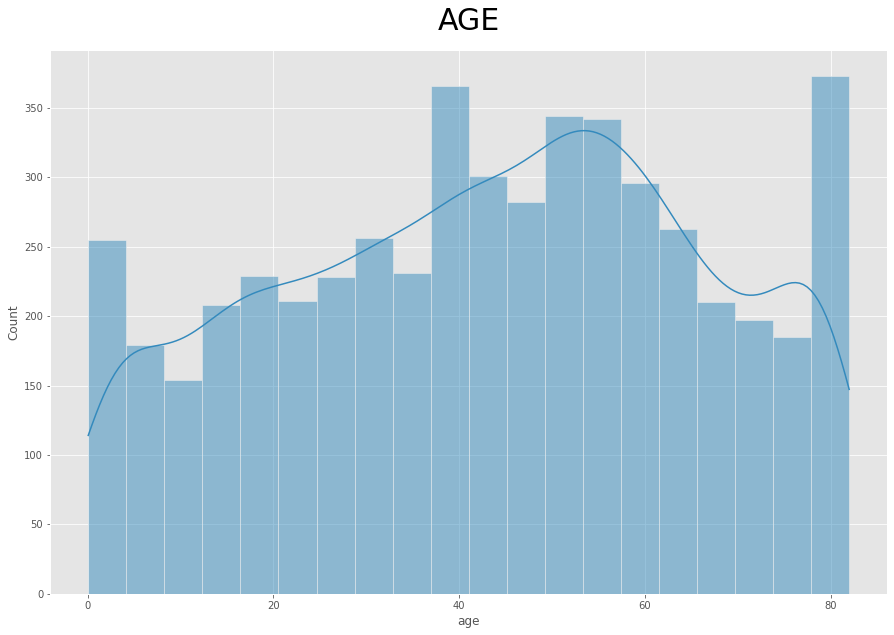

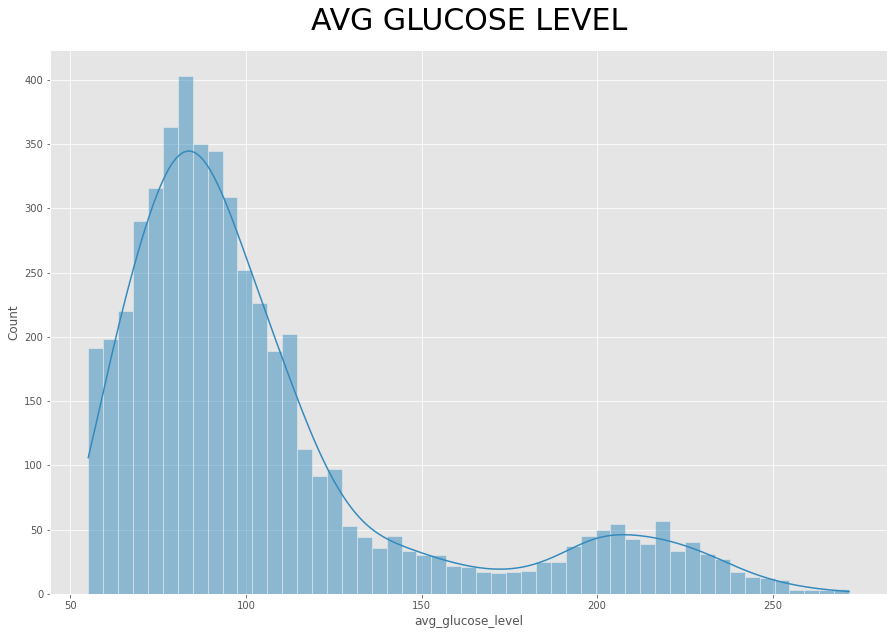

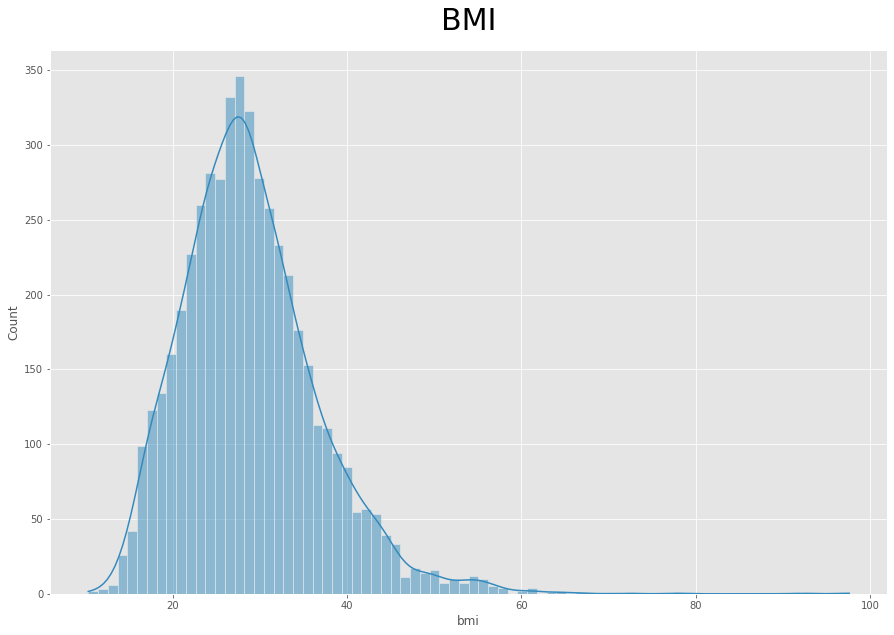

In [17]:
numeric_column = ['age', 'avg_glucose_level', 'bmi']

for column in numeric_column:
  plt.figure(figsize=(15,10))
  sns.histplot(data=df, x=column, kde=True)
  plt.title(column.upper().replace('_', ' '), fontsize=30, pad =20)
  plt.show()

Grafik diatas memiliki distribusi yang banyak

## Multivariate

### Terhadap Stroke

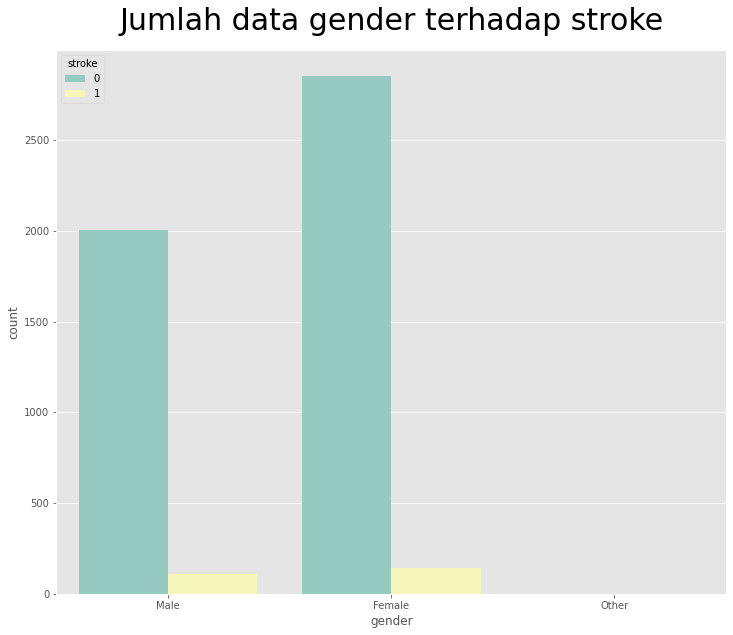

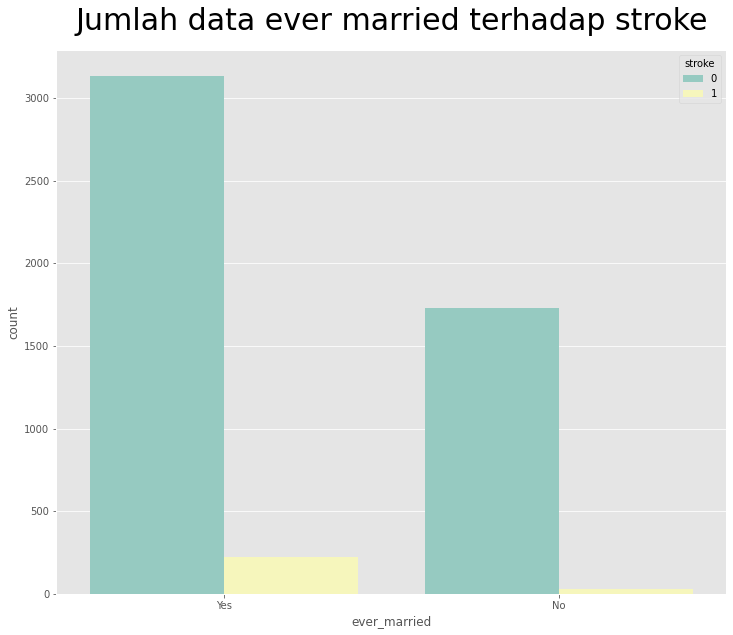

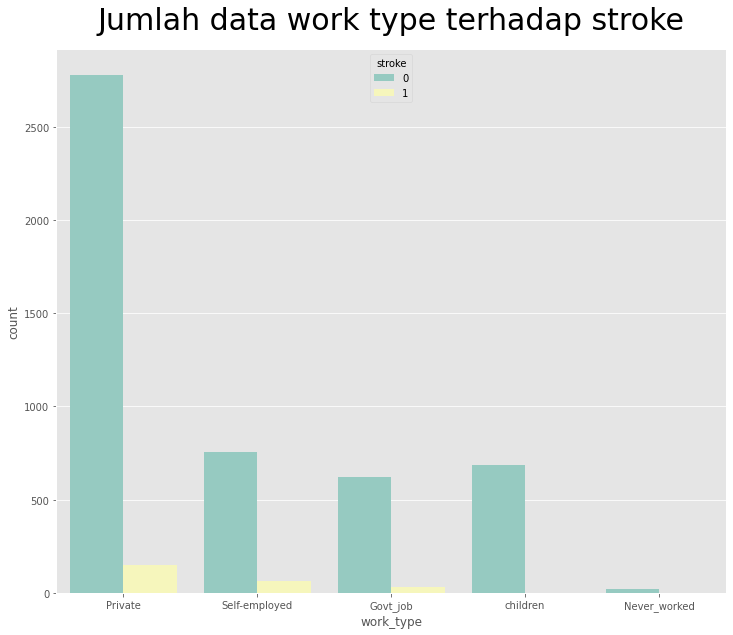

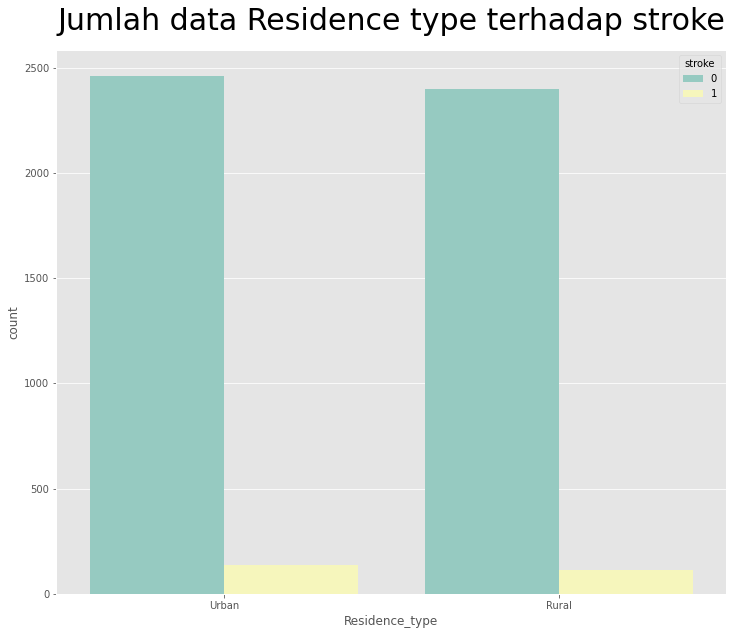

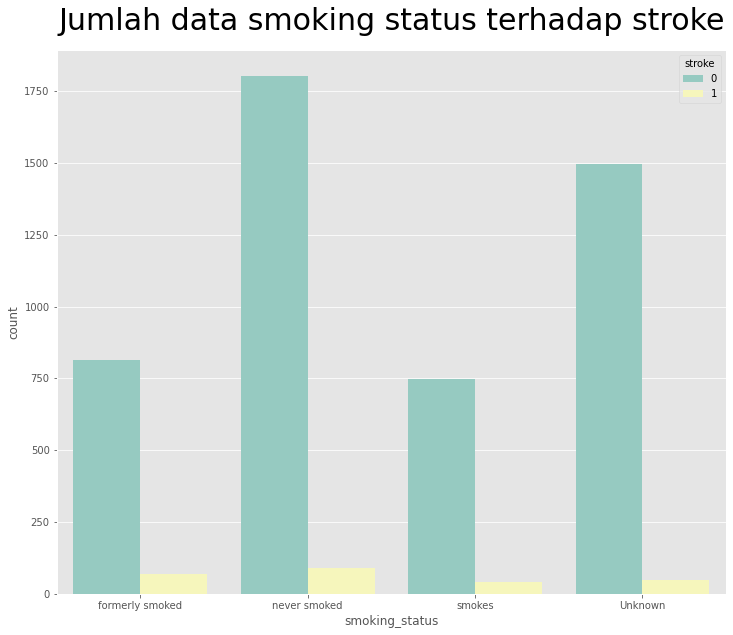

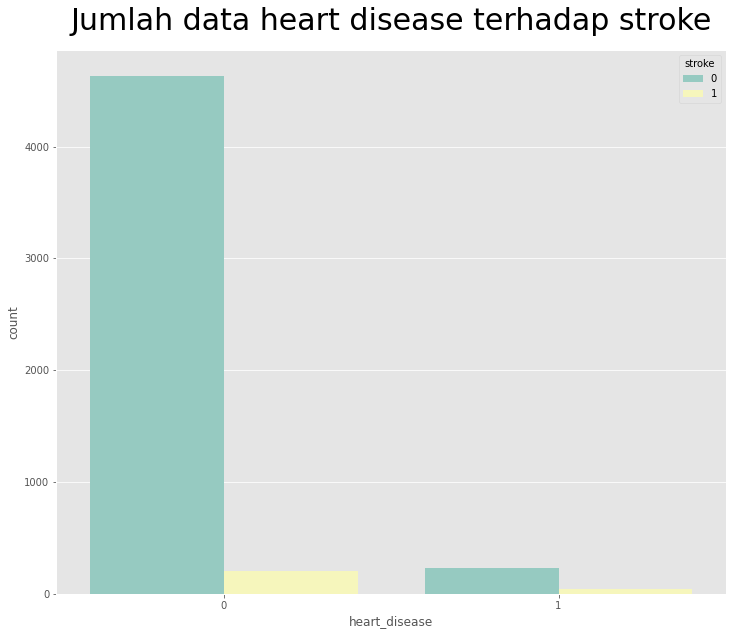

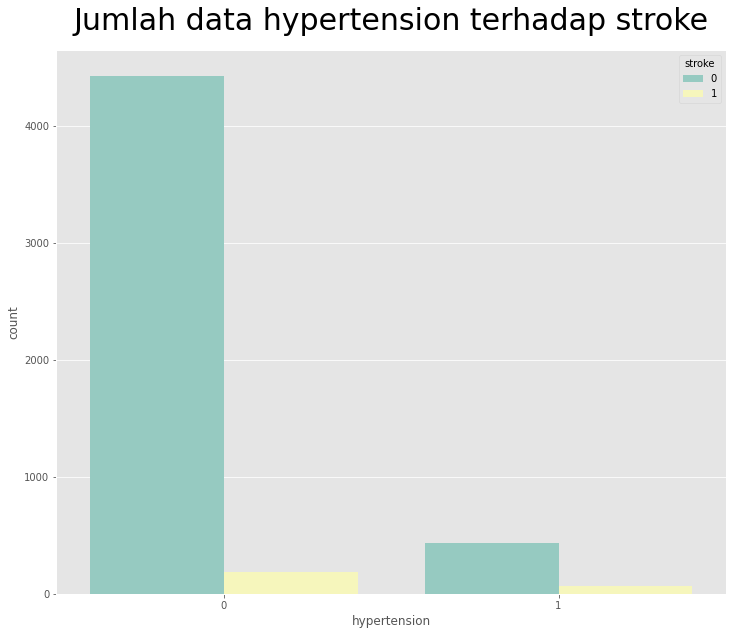

In [18]:
categoric_column = ['gender', 'ever_married', 'work_type', 
                    'Residence_type', 'smoking_status',
                    'heart_disease', 'hypertension']
                    
for column in categoric_column:
  plt.figure(figsize=(12,10))
  sns.countplot(data=df, x=column, palette='Set3', hue='stroke')
  plt.title('Jumlah data {} terhadap stroke'.format(column.replace('_', ' ')), fontsize=30, pad =20)
  plt.show()

### Terhadap Gender

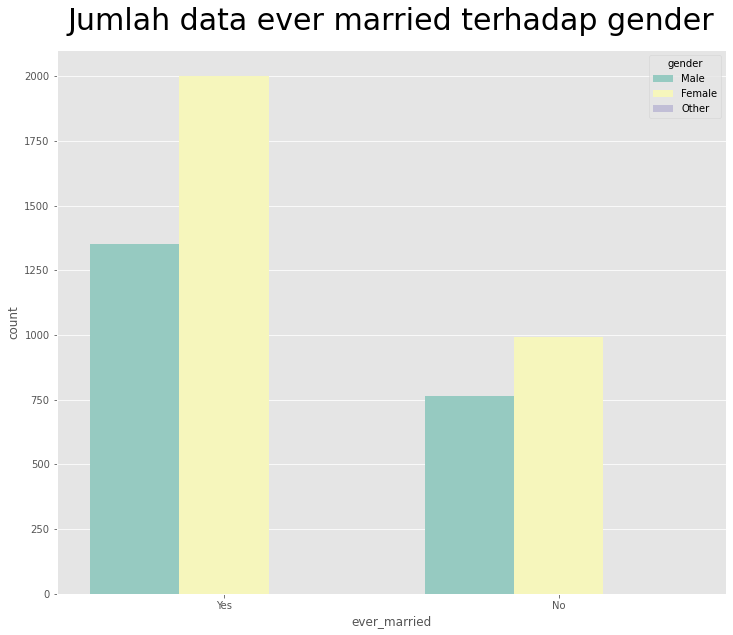

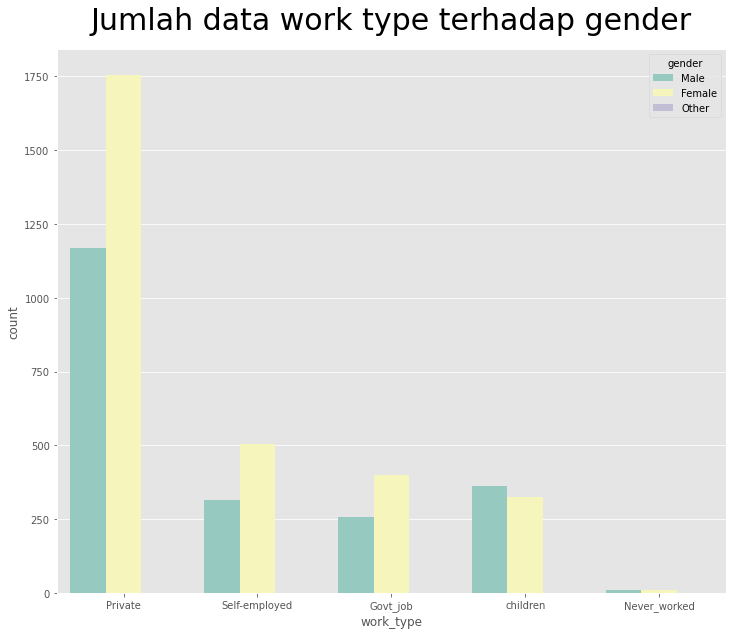

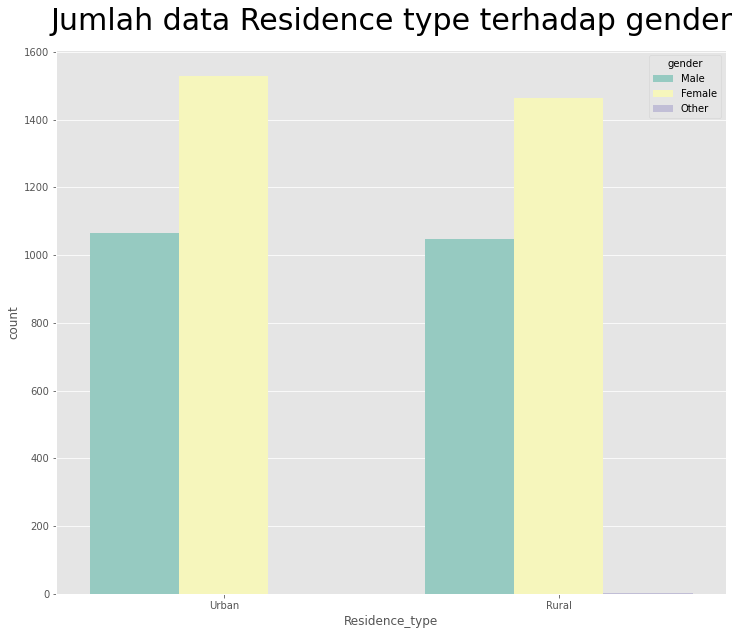

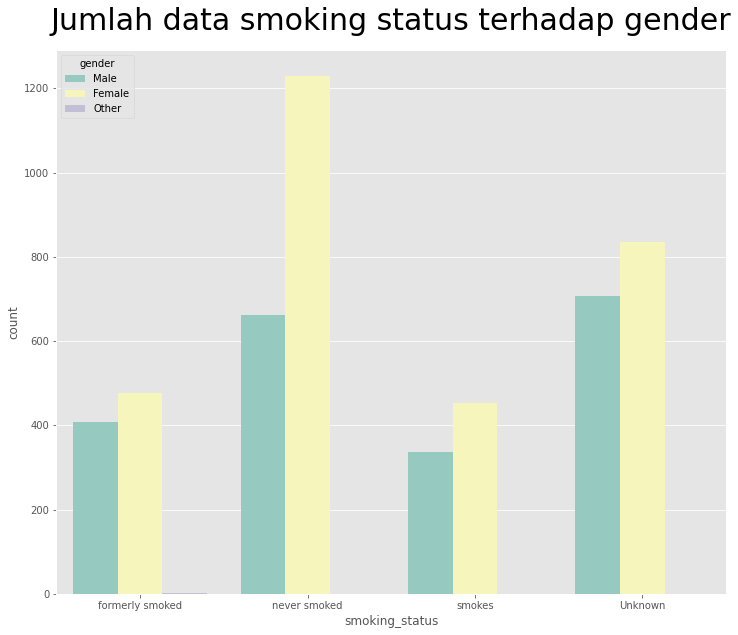

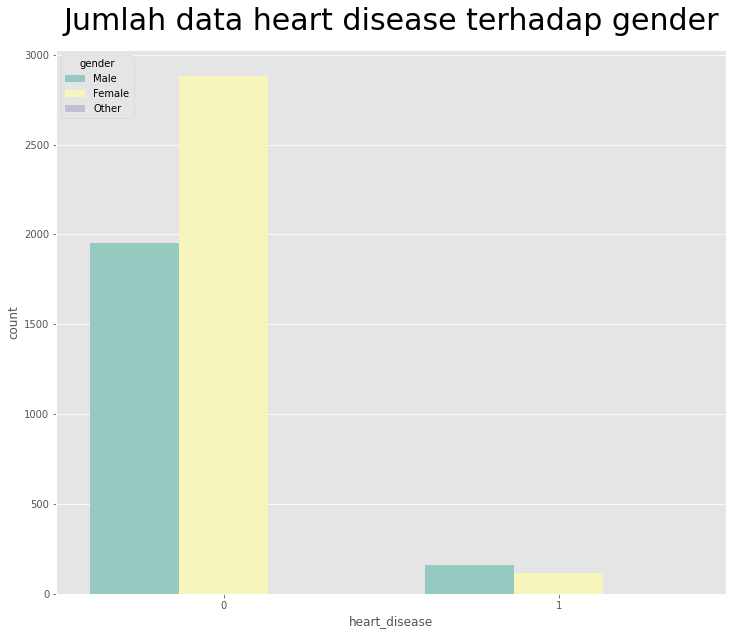

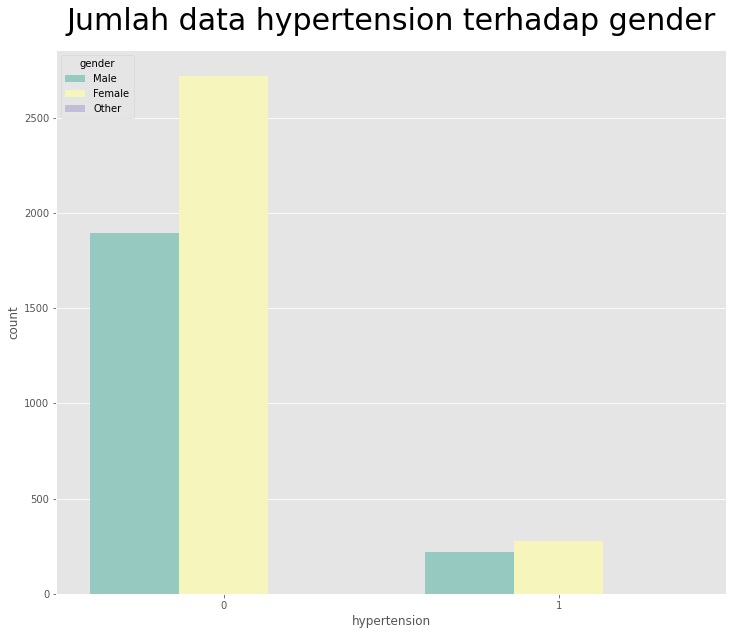

In [19]:
categoric_column = ['ever_married', 'work_type', 
                    'Residence_type', 'smoking_status',
                    'heart_disease', 'hypertension']
                    
for column in categoric_column:
  plt.figure(figsize=(12,10))
  sns.countplot(data=df, x=column, palette='Set3', hue='gender')
  plt.title('Jumlah data {} terhadap gender'.format(column.replace('_', ' ')), fontsize=30, pad =20)
  plt.show()

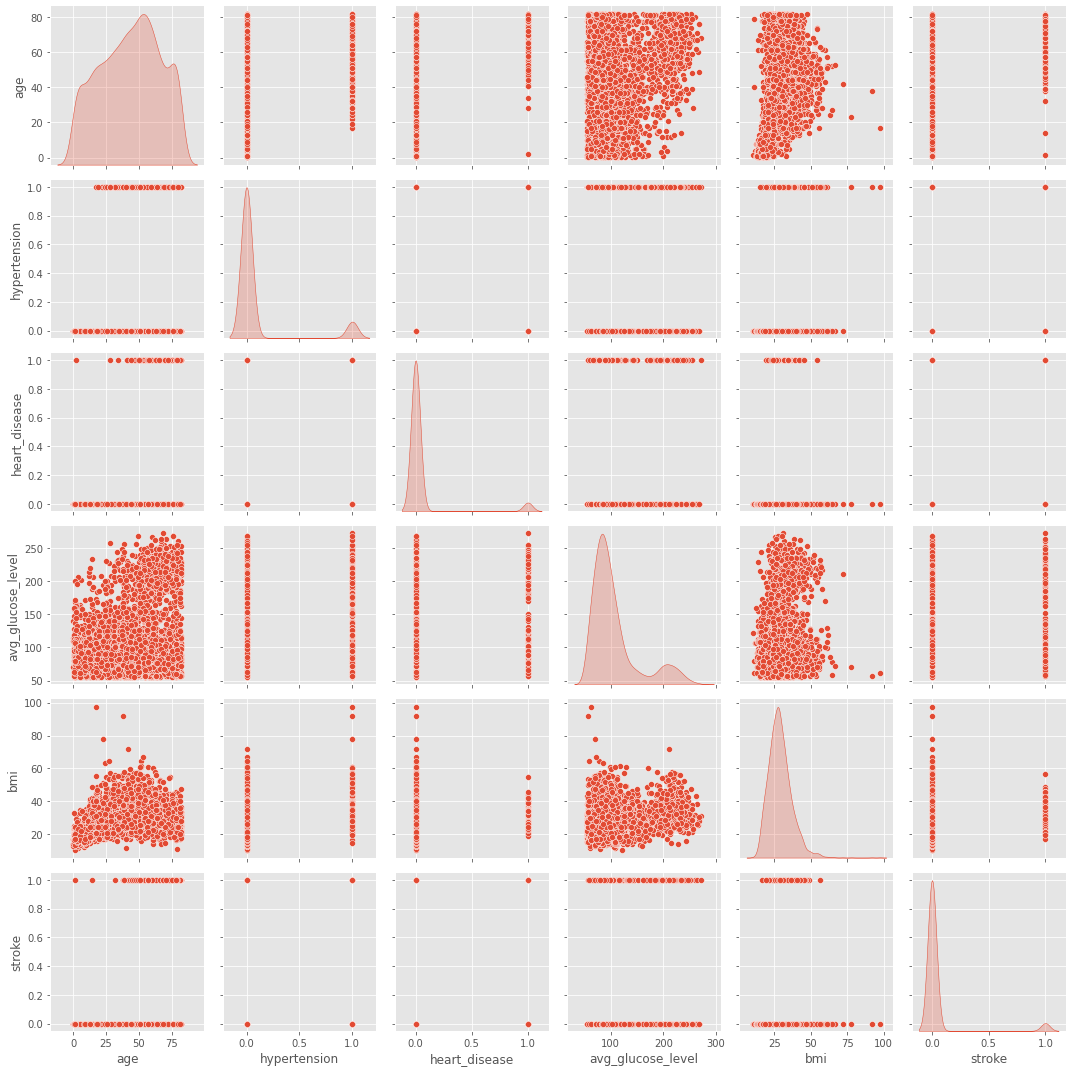

In [20]:
sns.pairplot(df.drop('id', axis=1), diag_kind="kde")
plt.tight_layout()
plt.show()

## Check Outliers

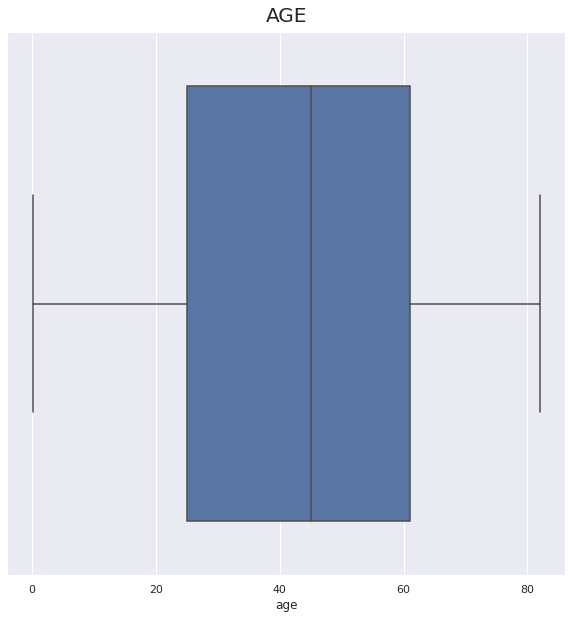

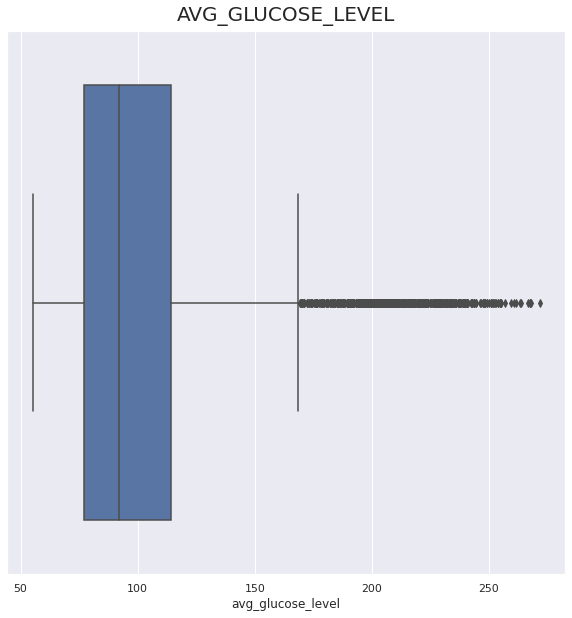

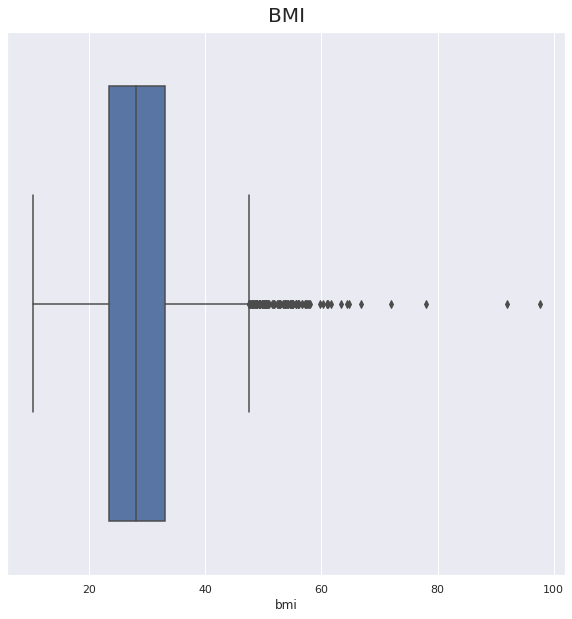

In [21]:
numeric_column = ['age', 'avg_glucose_level', 'bmi']

for column in numeric_column:
    sns.set(rc={"figure.figsize":(10, 10)})
    sns.boxplot(x=df[column])
    plt.title(column.upper(), fontsize=20, pad=10)
    plt.show()

In [22]:
# function Check Outliers
def check_outlier(df):
    for k, v in df.items():
        Q1        = v.quantile(0.25)
        Q3        = v.quantile(0.75)
        IQR       = Q3 - Q1
        v_range   = v[(v <= Q1 - 1.5 * IQR) | (v >= Q3 + 1.5 * IQR)]
        perc      = np.shape(v_range)[0] * 100.0 / df.shape[0]  
        print(f'Column :{k.upper()} =====> Outliers = {perc:.2f}%')

In [23]:
column = df[numeric_column]
check_outlier(column)

Column :AGE =====> Outliers = 0.00%
Column :AVG_GLUCOSE_LEVEL =====> Outliers = 12.27%
Column :BMI =====> Outliers = 2.21%


> Terlihat data diatas hanya feature `age` yang memiliki outlier tidak memiliki outliers

## Check Corelation

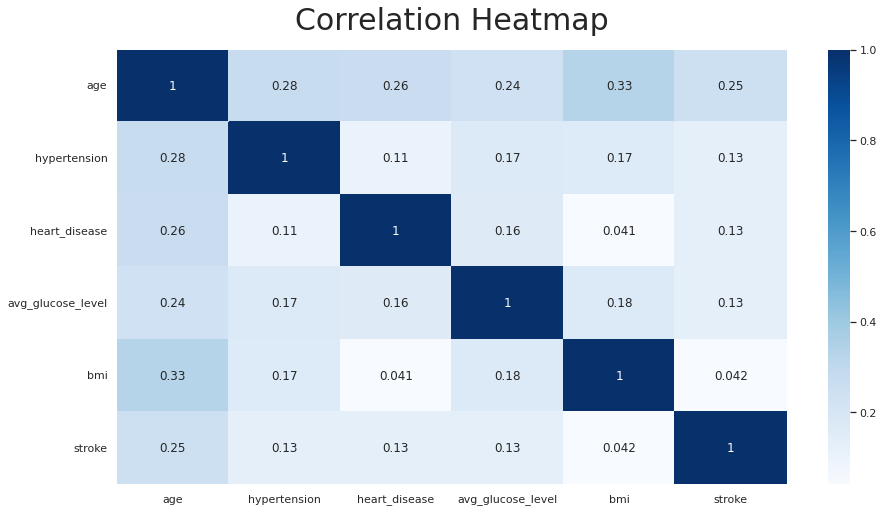

In [24]:
correlation = df.drop('id', axis=1)
correlation = correlation.corr()
plt.figure(figsize=(15,8))
sns.heatmap(data=correlation, annot=True, cmap='Blues')
plt.title('Correlation Heatmap', fontsize=30, pad=20)
plt.show()

# Data Preration

karena tidak ada data duplikat jadi kolom `id` tidak diperlukan maka di drop

In [25]:
df.drop('id', axis=1, inplace=True)

pada column gender terdapat nilai `Other` harus di drop karena data tersebut tidaklah relevan dengan gender manusia

In [26]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [27]:
df.drop(df[(df['gender']== 'Other')].index, inplace=True)

In [28]:
df['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [29]:
df.shape

(5109, 11)

untuk mempermudah dalam data preprocessing nama kolom data diubah menjadi huruf kecil dan mengganti `spasi kosong` atau `&` menjadi `_`

In [30]:
df.columns = df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')

## Handling Missing Value
Dalam EDA terdapat missing value pada attribut `bmi` body mass index saya akan mengisi missing value tersebut dengan rata-rata dari body mass index

In [31]:
mean_bmi = df['bmi'].mean()
print(f'Rata - rata BMI : {round(mean_bmi,1)}')

Rata - rata BMI : 28.9


In [32]:
df['bmi'] = df['bmi'].fillna(round(mean_bmi,1))

## Handling Outliers

Saya menggunakan metode z-score

In [33]:
#Function threshold Z-score
def threshold(z,d):
    for i in np.arange(3,5,0.2):
        data=d.copy()
        data=data[(z<i).all(axis=1)]
        loss=(d.shape[0]-data.shape[0])/d.shape[0]*100
        print('With threshold {} data loss is {}%'.format(np.round(i,1),np.round(loss,2))) 

## Find Z-score
from scipy.stats import zscore
z=np.abs(zscore(df[numeric_column]))

## Call Function
threshold(z,df[numeric_column])

With threshold 3.0 data loss is 2.11%
With threshold 3.2 data loss is 1.37%
With threshold 3.4 data loss is 0.82%
With threshold 3.6 data loss is 0.43%
With threshold 3.8 data loss is 0.27%
With threshold 4.0 data loss is 0.27%
With threshold 4.2 data loss is 0.18%
With threshold 4.4 data loss is 0.16%
With threshold 4.6 data loss is 0.14%
With threshold 4.8 data loss is 0.1%


In [34]:
new_df = df[(z < 3.0).all(axis=1)]

print(f'Total Data before Handling outliers : {df.shape[0]}')
print(f'Total Data after Handling outliers : {new_df.shape[0]}')

Total Data before Handling outliers : 5109
Total Data after Handling outliers : 5001


## Encode Data

### Label Encoder
Encode data object menjadi data numeric

In [35]:
new_df

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.9,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.9,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [36]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

In [37]:
# feature Gender
new_df['gender'] = LE.fit_transform(new_df['gender'])

In [38]:
new_df['gender'].value_counts()

0    2925
1    2076
Name: gender, dtype: int64

> Keterangan :
* Female = 0
* Male = 1

In [39]:
# feature ever_married
new_df['ever_married'] = LE.fit_transform(new_df['ever_married'])

In [40]:
new_df['ever_married'].value_counts()

1    3260
0    1741
Name: ever_married, dtype: int64

> Keterangan :
* Yes = 1
* No = 0

In [41]:
# feature residence_type
new_df['residence_type'] = LE.fit_transform(new_df['residence_type'])

In [42]:
new_df['residence_type'].value_counts()

1    2542
0    2459
Name: residence_type, dtype: int64

> Keterangan :
* Urban = 1
* Rural = 0

### OneHot Encoder
Encode data object menjadi data numeric

In [43]:
from sklearn.preprocessing import OneHotEncoder

In [44]:
# List column
new_df.columns.tolist()

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

In [45]:
new_df = pd.get_dummies(new_df, columns=['smoking_status', 'work_type'])

In [46]:
new_df.columns.tolist()

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'residence_type',
 'avg_glucose_level',
 'bmi',
 'stroke',
 'smoking_status_Unknown',
 'smoking_status_formerly smoked',
 'smoking_status_never smoked',
 'smoking_status_smokes',
 'work_type_Govt_job',
 'work_type_Never_worked',
 'work_type_Private',
 'work_type_Self-employed',
 'work_type_children']

In [47]:
new_df

,gender,age,hypertension,heart_disease,ever_married,residence_type,avg_glucose_level,bmi,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,1,67.0,0,1,1,1,228.69,36.6,1,0,1,0,0,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,28.9,1,0,0,1,0,0,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.5,1,0,0,1,0,0,0,1,0,0
3,0,49.0,0,0,1,1,171.23,34.4,1,0,0,0,1,0,0,1,0,0
4,0,79.0,1,0,1,0,174.12,24.0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,1,83.75,28.9,0,0,0,1,0,0,0,1,0,0
5106,0,81.0,0,0,1,1,125.20,40.0,0,0,0,1,0,0,0,0,1,0
5107,0,35.0,0,0,1,0,82.99,30.6,0,0,0,1,0,0,0,0,1,0
5108,1,51.0,0,0,1,0,166.29,25.6,0,0,1,0,0,0,0,1,0,0


## Data Keseluruhan setelah di bersihkan

In [48]:
list_item = []
for col in new_df.columns:
    list_item.append([col, new_df[col].dtype, new_df[col].isna().sum(), 
                      100*new_df[col].isna().sum()/len(new_df[col]), 
                      new_df[col].nunique(), new_df[col].unique()[:4]])
desc_df = pd.DataFrame(data=list_item, 
                       columns='Feature Data_Type Null_num Null_pct Unique_num Unique_Sample'.split())
desc_df

,Feature,Data_Type,Null_num,Null_pct,Unique_num,Unique_Sample
0,gender,int64,0,0.0,2,"[1, 0]"
1,age,float64,0,0.0,104,"[67.0, 61.0, 80.0, 49.0]"
2,hypertension,int64,0,0.0,2,"[0, 1]"
3,heart_disease,int64,0,0.0,2,"[1, 0]"
4,ever_married,int64,0,0.0,2,"[1, 0]"
5,residence_type,int64,0,0.0,2,"[1, 0]"
6,avg_glucose_level,float64,0,0.0,3886,"[228.69, 202.21, 105.92, 171.23]"
7,bmi,float64,0,0.0,375,"[36.6, 28.9, 32.5, 34.4]"
8,stroke,int64,0,0.0,2,"[1, 0]"
9,smoking_status_Unknown,uint8,0,0.0,2,"[0, 1]"



## Handling Imbalance Data
Saya menggunakan teknik oversampling dengan SMOTE

In [49]:
# Oversampling target
from imblearn.over_sampling import SMOTE
x = new_df.loc[:, new_df.columns != 'stroke']
y = new_df['stroke']

seed = 78
k = 1
sm = SMOTE(sampling_strategy='auto', k_neighbors=k, random_state=seed)

x_res, y_res = sm.fit_resample(x, y)

In [50]:
# Mengabungkan hasil oversampling ke dataframe
new_df_fix = pd.concat([pd.DataFrame(x_res), pd.DataFrame(y_res)],axis=1)

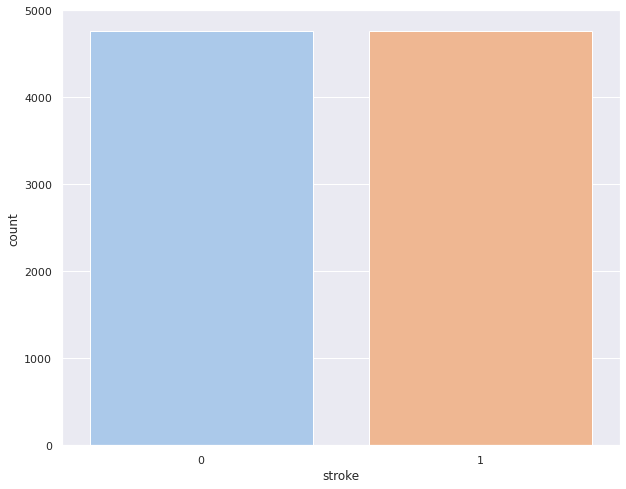

In [51]:
plt.figure(figsize=(10,8))
sns.countplot(data=new_df_fix, x ='stroke', palette='pastel')
plt.show()

> Sekarang data sudah berimbang

## Check Corelation

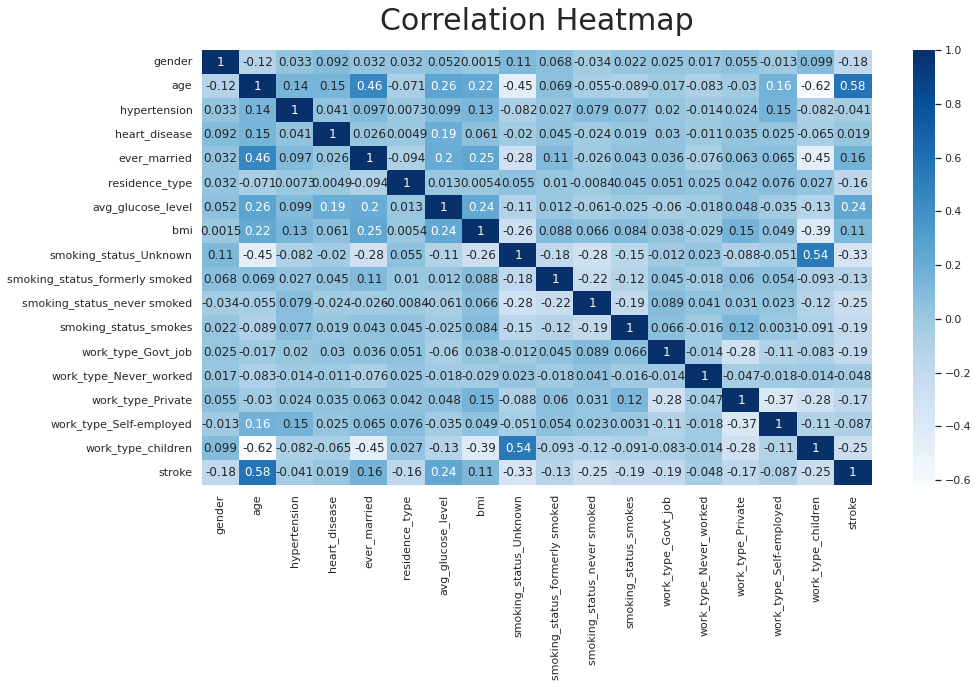

In [52]:
correlation = new_df_fix
correlation = correlation.corr()
plt.figure(figsize=(15,8))
sns.heatmap(data=correlation, annot=True, cmap='Blues')
plt.title('Correlation Heatmap', fontsize=30, pad=20)
plt.show()

## Train-Test-Split
Split data menjadi dua Train dan Test

In [53]:
from sklearn.model_selection import train_test_split

X = new_df_fix.drop(['stroke'], axis=1)
y = new_df_fix['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=42)

### Standarization

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Modeling
Model yang akan digunakan adalah :
* Suport Vector Machine
* Decision Tree
* Random Forest
* Logistic Regression
* K-Neighbors

## Hyper Tuning Parameters

In [55]:
from sklearn.model_selection import GridSearchCV

## Function for modeling

In [56]:
# function check metrix evalute
from sklearn.metrics import confusion_matrix, classification_report

def evaluation(name, model):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print(f'{name.upper()} TRAINING RESULT:')
    print('======================================================')
    print('Accuracy:', model.score(X_train, y_train))
    print('======================================================')
    print('Classification Report --------------------------------')
    print(classification_report(y_train, y_train_pred))
    print('======================================================')
    print('Confussion Matrix ------------------------------------')
    print(confusion_matrix(y_train, y_train_pred))

    print('\n======================================================')

    print(f'\n {name.upper()} TESTING RESULT:')
    print('======================================================')
    print('Accuracy:', model.score(X_test, y_test))
    print('======================================================')
    print('Classification Report --------------------------------')
    print(classification_report(y_test, y_test_pred))
    print('======================================================')
    print('Confussion Matrix ------------------------------------')
    print(confusion_matrix(y_test, y_test_pred))

In [57]:
# Function Evaluate score (accuracy)
def evaluate_model(model_dict):
    frame = pd.DataFrame(columns=['Training','Testing'])
    
    for name, model in model_dict.items():
        frame.loc[name, 'Training'] = model.score(X_train, y_train)
        frame.loc[name, 'Testing'] = model.score(X_test, y_test)
        
    return frame

In [58]:
# Check 10 Feature Importance (Random Forest)
def feature_importance(model_rf):
    X_ = np.array(X)
    importance_scores = model_rf.feature_importances_
    indices = np.argsort(importance_scores)

    plt.figure(figsize=(15, 10))
    feature_importances = pd.Series(model.feature_importances_, index=[X])
    feature_importances.nlargest(10).sort_values(ascending=True).plot(kind='barh')
    plt.title('Feature Importance using Random Forest')
    plt.show()

## Support Vector Machine

In [59]:
from sklearn.svm import SVC

In [60]:
# using StandarScaler
model_svc = SVC()
model_svc.fit(X_train, y_train)

SVC()

In [61]:
nama = 'Support Vector Machine'.upper()
model = model_svc

evaluation(nama, model)

SUPPORT VECTOR MACHINE TRAINING RESULT:
Accuracy: 0.9625935162094763
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      3801
           1       0.99      0.94      0.96      3818

    accuracy                           0.96      7619
   macro avg       0.96      0.96      0.96      7619
weighted avg       0.96      0.96      0.96      7619

Confussion Matrix ------------------------------------
[[3763   38]
 [ 247 3571]]


 SUPPORT VECTOR MACHINE TESTING RESULT:
Accuracy: 0.9553805774278216
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       961
           1       0.98      0.93      0.95       944

    accuracy                           0.96      1905
   macro avg       0.96      0.96      0.96      1905
weighted avg       0.96      0.96      0.96      1905

Confussion Mat

### Hyper tunning 

In [62]:
params = {
    'C': [0.01, 0.1, 0.5, 1, 10],
    'gamma': [0.1, 0.01, 0.001, 'auto', 'scale'],
    'kernel': ['rbf', 'poly', 'linear', 'sigmoid']
}

In [63]:
grid = GridSearchCV(SVC(), params)
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1, 10],
                         'gamma': [0.1, 0.01, 0.001, 'auto', 'scale'],
                         'kernel': ['rbf', 'poly', 'linear', 'sigmoid']})

In [64]:
bestparams = grid.best_params_
print(f'best parameter = {bestparams}')

best parameter = {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


#### Model with SVC with best parameters

In [65]:
model_svc_tuning = SVC(**bestparams)
model_svc_tuning.fit(X_train, y_train)

SVC(C=10, gamma=0.1)

In [66]:
nama = 'Support Vector Machine'.upper()
model = model_svc_tuning

evaluation(nama, model)

SUPPORT VECTOR MACHINE TRAINING RESULT:
Accuracy: 0.9772936080850505
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3801
           1       0.99      0.97      0.98      3818

    accuracy                           0.98      7619
   macro avg       0.98      0.98      0.98      7619
weighted avg       0.98      0.98      0.98      7619

Confussion Matrix ------------------------------------
[[3761   40]
 [ 133 3685]]


 SUPPORT VECTOR MACHINE TESTING RESULT:
Accuracy: 0.9627296587926509
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       961
           1       0.98      0.95      0.96       944

    accuracy                           0.96      1905
   macro avg       0.96      0.96      0.96      1905
weighted avg       0.96      0.96      0.96      1905

Confussion Mat

In [67]:
model_dict = {
    'SVM': model_svc,
    'SVM With Tuning': model_svc_tuning,
}

evaluate_model(model_dict)

,Training,Testing
SVM,0.962594,0.955381
SVM With Tuning,0.977294,0.96273


> Model SVM mengalami peningkatan setelah dituning

## Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
model_rf = RandomForestClassifier(max_depth=2, random_state=0)
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [70]:
nama = 'Random Forest'.upper()
model = model_rf

evaluation(nama, model)

RANDOM FOREST TRAINING RESULT:
Accuracy: 0.8155925974537341
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.90      0.71      0.79      3801
           1       0.76      0.92      0.83      3818

    accuracy                           0.82      7619
   macro avg       0.83      0.82      0.81      7619
weighted avg       0.83      0.82      0.81      7619

Confussion Matrix ------------------------------------
[[2690 1111]
 [ 294 3524]]


 RANDOM FOREST TESTING RESULT:
Accuracy: 0.7952755905511811
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.89      0.68      0.77       961
           1       0.74      0.91      0.82       944

    accuracy                           0.80      1905
   macro avg       0.81      0.80      0.79      1905
weighted avg       0.81      0.80      0.79      1905

Confussion Matrix --------------

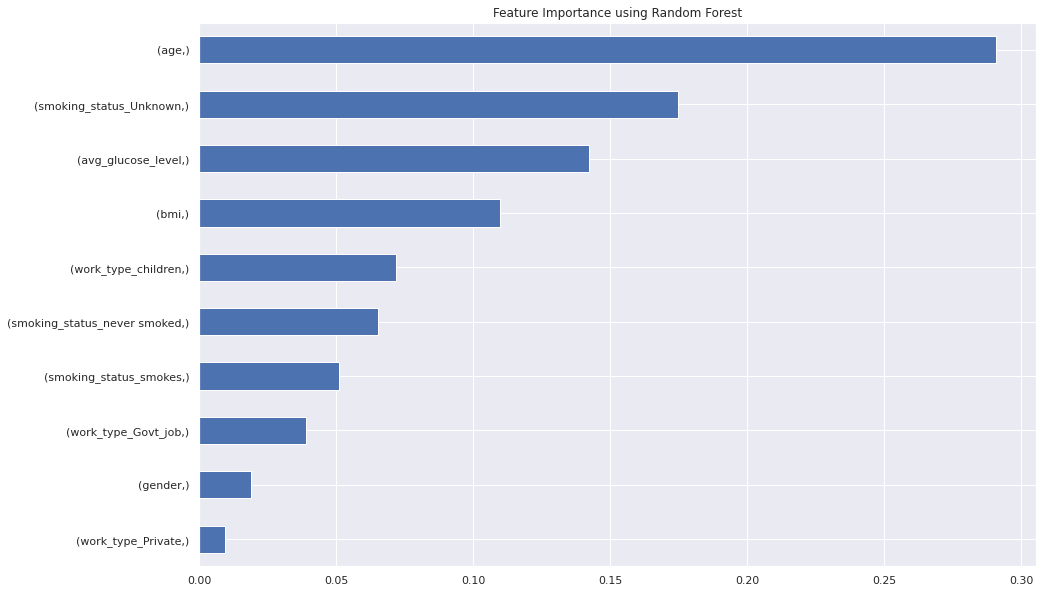

In [71]:
feature_importance(model)

### Hyper Tuning 

In [72]:
params = {
    'n_estimators':[100,150,200],
    'criterion':['gini','entropy'],
    'max_depth' : [1,2,3,4,5]
    }

In [73]:
grid = GridSearchCV(RandomForestClassifier(), params)
grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [100, 150, 200]})

In [74]:
bestparams = grid.best_params_
print(f'best parameter = {bestparams}')

best parameter = {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 150}


### Model with tuning

In [78]:
model_rf_tuning = RandomForestClassifier(**bestparams)
model_rf_tuning.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=150)

In [79]:
nama = 'Random Forest'.upper()
model = model_rf_tuning

evaluation(nama, model)

RANDOM FOREST TRAINING RESULT:
Accuracy: 0.9020868880430503
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      3801
           1       0.88      0.94      0.91      3818

    accuracy                           0.90      7619
   macro avg       0.90      0.90      0.90      7619
weighted avg       0.90      0.90      0.90      7619

Confussion Matrix ------------------------------------
[[3289  512]
 [ 234 3584]]


 RANDOM FOREST TESTING RESULT:
Accuracy: 0.8918635170603675
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.94      0.84      0.89       961
           1       0.85      0.94      0.90       944

    accuracy                           0.89      1905
   macro avg       0.90      0.89      0.89      1905
weighted avg       0.90      0.89      0.89      1905

Confussion Matrix --------------

In [80]:
model_dict = {
    'Random Forest': model_rf,
    'Random Forest With Tuning': model_rf_tuning
}

evaluate_model(model_dict)

,Training,Testing
Random Forest,0.815593,0.795276
Random Forest With Tuning,0.902087,0.891864


> Model Random Forest mengalami peningkatan setelah dituning

## Decision Tree

In [84]:
from sklearn.tree import DecisionTreeClassifier

In [85]:
model_dt = DecisionTreeClassifier(random_state=0)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [86]:
nama = 'Decision Tree'.upper()
model = model_dt

evaluation(nama, model)

DECISION TREE TRAINING RESULT:
Accuracy: 1.0
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3801
           1       1.00      1.00      1.00      3818

    accuracy                           1.00      7619
   macro avg       1.00      1.00      1.00      7619
weighted avg       1.00      1.00      1.00      7619

Confussion Matrix ------------------------------------
[[3801    0]
 [   0 3818]]


 DECISION TREE TESTING RESULT:
Accuracy: 0.9443569553805774
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       961
           1       0.93      0.95      0.94       944

    accuracy                           0.94      1905
   macro avg       0.94      0.94      0.94      1905
weighted avg       0.94      0.94      0.94      1905

Confussion Matrix -----------------------------

## Logistic Regression

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
model_lr = LogisticRegression(random_state=0)
model_lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [83]:
nama = 'Logistic Regression'.upper()
model = model_lr

evaluation(nama, model)

LOGISTIC REGRESSION TRAINING RESULT:
Accuracy: 0.9305683160519753
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      3801
           1       0.97      0.89      0.93      3818

    accuracy                           0.93      7619
   macro avg       0.93      0.93      0.93      7619
weighted avg       0.93      0.93      0.93      7619

Confussion Matrix ------------------------------------
[[3698  103]
 [ 426 3392]]


 LOGISTIC REGRESSION TESTING RESULT:
Accuracy: 0.926509186351706
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       961
           1       0.96      0.89      0.92       944

    accuracy                           0.93      1905
   macro avg       0.93      0.93      0.93      1905
weighted avg       0.93      0.93      0.93      1905

Confussion Matrix ---

### Hyper Tuning

In [93]:
params = {
    "penalty": ['l1', 'l2'], 
    'C': [0.001, 0.01, 0.025,0.05],
    'random_state' : [0, 2, 1, 42]
    }

In [94]:
grid = GridSearchCV(LogisticRegression(), params)
grid.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.025, 0.05],
                         'penalty': ['l1', 'l2'],
                         'random_state': [0, 2, 1, 42]})

In [95]:
bestparams = grid.best_params_
print(f'best parameter = {bestparams}')

best parameter = {'C': 0.05, 'penalty': 'l2', 'random_state': 0}


### Model with Tuning

In [96]:
model_lr_tuning = LogisticRegression(**bestparams)
model_lr_tuning.fit(X_train, y_train)

LogisticRegression(C=0.05, random_state=0)

In [97]:
nama = 'Logistic Regression'.upper()
model = model_lr_tuning

evaluation(nama, model)

LOGISTIC REGRESSION TRAINING RESULT:
Accuracy: 0.9300433127707048
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      3801
           1       0.97      0.89      0.93      3818

    accuracy                           0.93      7619
   macro avg       0.93      0.93      0.93      7619
weighted avg       0.93      0.93      0.93      7619

Confussion Matrix ------------------------------------
[[3694  107]
 [ 426 3392]]


 LOGISTIC REGRESSION TESTING RESULT:
Accuracy: 0.925984251968504
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       961
           1       0.96      0.89      0.92       944

    accuracy                           0.93      1905
   macro avg       0.93      0.93      0.93      1905
weighted avg       0.93      0.93      0.93      1905

Confussion Matrix ---

In [98]:
model_dict = {
    'Logistic Regression': model_lr,
    'Logistic Regression With Tuning': model_lr_tuning
}

evaluate_model(model_dict)

,Training,Testing
Logistic Regression,0.930568,0.926509
Logistic Regression With Tuning,0.930043,0.925984


> Model Logistic regression setelah ditunning mengalami penurunan

## K-Neighbors

In [99]:
from sklearn.neighbors import KNeighborsClassifier

In [100]:
model_kn = KNeighborsClassifier()
model_kn.fit(X_train, y_train)

KNeighborsClassifier()

In [101]:
nama = 'K-Neighbors'.upper()
model = model_kn

evaluation(nama, model)

K-NEIGHBORS TRAINING RESULT:
Accuracy: 0.9749310933193333
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      3801
           1       0.99      0.96      0.97      3818

    accuracy                           0.97      7619
   macro avg       0.98      0.97      0.97      7619
weighted avg       0.98      0.97      0.97      7619

Confussion Matrix ------------------------------------
[[3769   32]
 [ 159 3659]]


 K-NEIGHBORS TESTING RESULT:
Accuracy: 0.9658792650918635
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       961
           1       0.98      0.95      0.97       944

    accuracy                           0.97      1905
   macro avg       0.97      0.97      0.97      1905
weighted avg       0.97      0.97      0.97      1905

Confussion Matrix ------------------

### Hyper Tuning

In [102]:
params = {
    'n_neighbors':[5,7,8,10], 
    'metric': ['euclidean', 'manhattan', 
               'chebyshev', 'minkowski']
          }

In [103]:
grid = GridSearchCV(KNeighborsClassifier(), params)
grid.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski'],
                         'n_neighbors': [5, 7, 8, 10]})

In [104]:
bestparams = grid.best_params_
print(f'best parameter = {bestparams}')

best parameter = {'metric': 'euclidean', 'n_neighbors': 5}


### Model with Tunning

In [105]:
model_kn_tuning = KNeighborsClassifier(**bestparams)
model_kn_tuning.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [106]:
nama = 'K-Neighbors'.upper()
model = model_kn_tuning

evaluation(nama, model)

K-NEIGHBORS TRAINING RESULT:
Accuracy: 0.9749310933193333
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      3801
           1       0.99      0.96      0.97      3818

    accuracy                           0.97      7619
   macro avg       0.98      0.97      0.97      7619
weighted avg       0.98      0.97      0.97      7619

Confussion Matrix ------------------------------------
[[3769   32]
 [ 159 3659]]


 K-NEIGHBORS TESTING RESULT:
Accuracy: 0.9658792650918635
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       961
           1       0.98      0.95      0.97       944

    accuracy                           0.97      1905
   macro avg       0.97      0.97      0.97      1905
weighted avg       0.97      0.97      0.97      1905

Confussion Matrix ------------------

In [107]:
model_dict = {
    'K-Neighbors': model_kn,
    'K-Neighbors With Tuning': model_kn_tuning
}

evaluate_model(model_dict)

,Training,Testing
K-Neighbors,0.974931,0.965879
K-Neighbors With Tuning,0.974931,0.965879


> Model K-Neighbors Tidak ada perbedaan seetelah dituning

# Kesimpulan

In [110]:
model_dict = {
    'Support Vector Machine' : model_svc_tuning,
    'Random Forest' : model_rf_tuning,
    'Logistic Regression' : model_lr,
    'K-Neighbors' : model_kn_tuning,
    'Decision Tree' : model_dt 
}

evaluation_model = evaluate_model(model_dict)
evaluation_model

,Training,Testing
Support Vector Machine,0.977294,0.96273
Random Forest,0.902087,0.891864
Logistic Regression,0.930568,0.926509
K-Neighbors,0.974931,0.965879
Decision Tree,1,0.944357


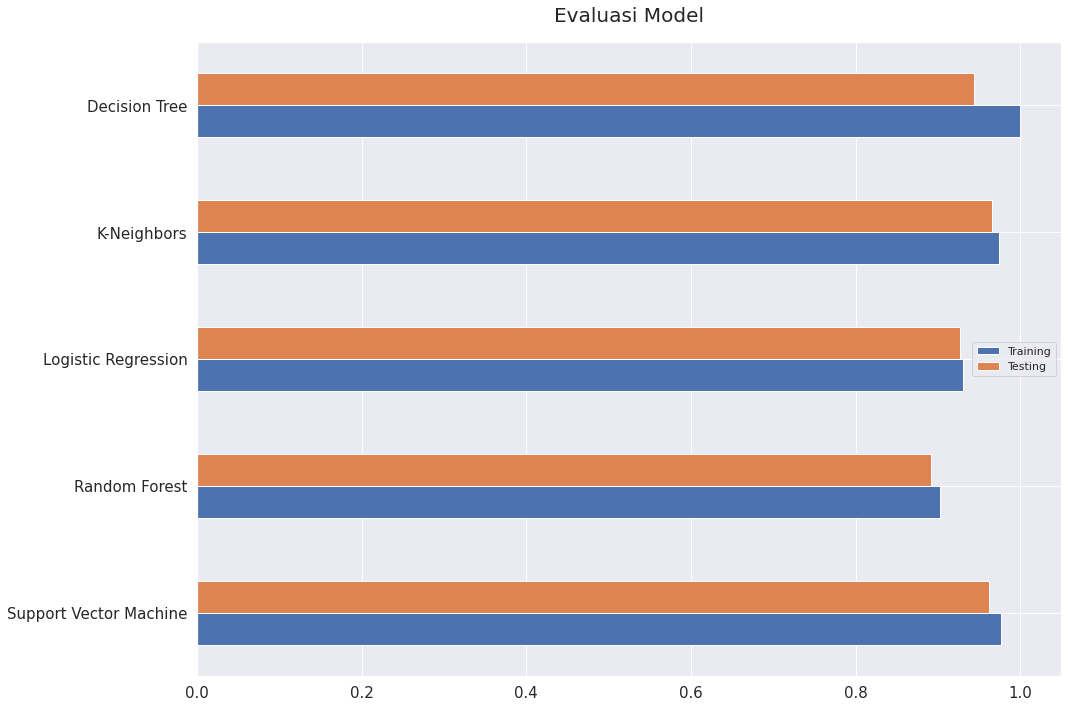

In [111]:
evaluation_model.plot(kind='barh', figsize=(15,10), fontsize=15)
plt.title('Evaluasi Model', fontsize=20, pad=20)
plt.tight_layout()
plt.show()